#### Eleonora Bellasio (15650A)
# <span style="color:orangered">Laboratorio di Simulazione Numerica: Esercitazione 1

### <span style="color:royalblue">Esercizio 01.1

Per testare il generatore di numeri pseudo-csuali, si sono calcolate le grandezze $\langle r \rangle$ e $\sigma^2$ utilizzando il metodo della media a blocchi. 

Per ritenere completo un calcolo Monte Carlo è necessario quantificare l'errore statistico della grandezza calcolata. Questo errore è solitamente calcolabile mediante deviazione standard, che però richiede una stima abbastanza precisa della varinaza, definita come:
$$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
Però, può non essere sempre facile stimare bene la varianza per un calcolo Monte Carlo a causa della correlazione presente tra campioni successivi.
Quindi, si utilizza il metodo della media a blocchi perchè permette di dimunuire la correlazione dei dati e quindi di stimare l'incertezza asssociata ad una grandezza calcolata tramite simulazione Monte Carlo. Le formule utilizzate sono:
$$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$

1. Stima di $\langle r \rangle = \int_0^1 r dr = 1/2$ e della sua incertezza per un numero di lanci $M=10^4$ in funzione del numero $N=100$ di blocchi. Si è costruito un grafico che rappresenta l'andamento dell'integrale con barre d'errore in funzione dei blocchi ed uno che rappresenta l'andamento dell'errore in funzione dei blocchi per verificare che tale andamento rispetti la legge $ 1/\sqrt N$, dovuta al teorema del limite centrale.

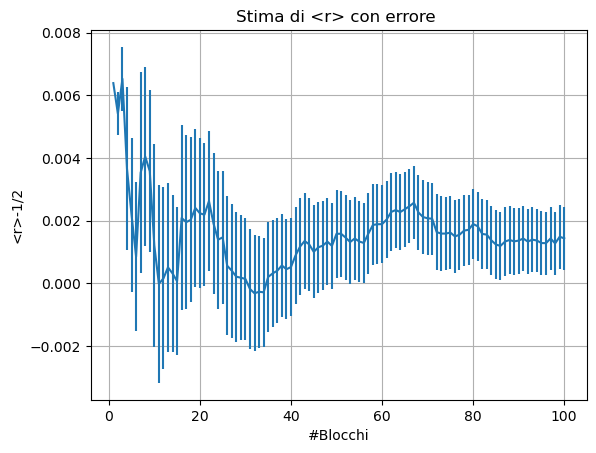

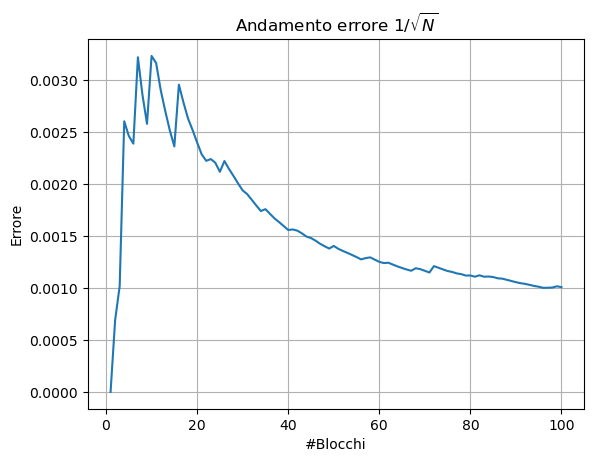

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import os,sys

dinp = "01.1/"
finp1 = dinp + "ese_01_1_pt1.out"
finp2 = dinp + "ese_01_1_pt2.out"
finp3 = dinp + "ese_01_1_pt3.out"

if not os.path.isfile(finp1):
    sys.exit( "file does not exist: " + finp1 )

# plot delle medie
x, y, error = np.loadtxt(finp1, usecols=(0,2,3), delimiter=' ', unpack='true')

plt.errorbar(x,y-0.5,yerr=error)
plt.xlabel('#Blocchi')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.title('Stima di <r> con errore ')
plt.show()

#verifico l'andamento atteso per l'errore
y, error = np.loadtxt(finp1, usecols=(0,3), delimiter=' ', unpack='true')

plt.errorbar(y, error)
plt.xlabel('#Blocchi')
plt.ylabel('Errore')
plt.grid(True)
plt.title(r'Andamento errore $1/\sqrt{N}$')
plt.show()



2. Srima di $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$ e della sua incertezza per un numero di lanci $M=10^4$ in funzione del numero $N=100$ di blocchi. I grafici sono stati costruiti in maniera analoga al caso precedente.

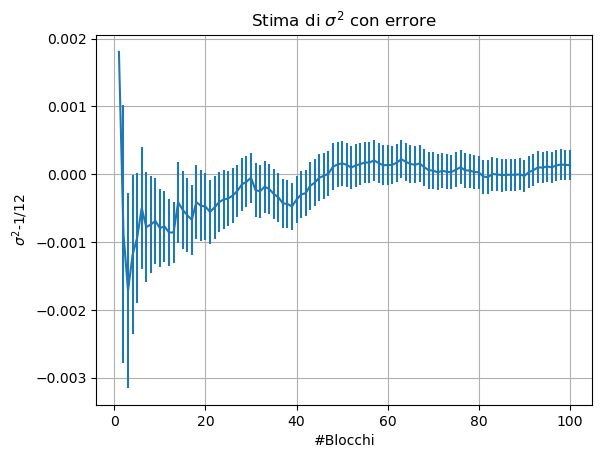

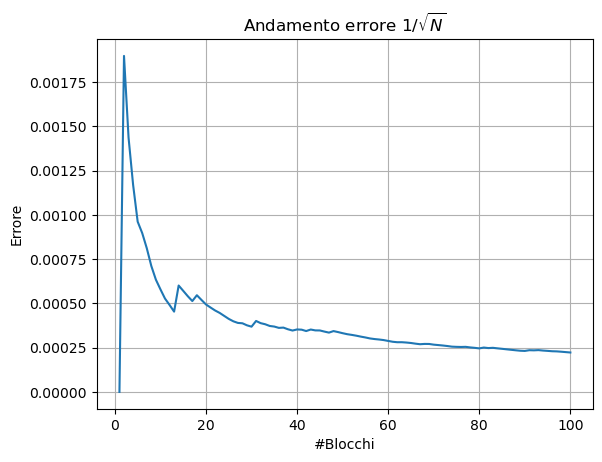

In [3]:
# parte 2 

if not os.path.isfile(finp2):
    sys.exit( "file does not exist: " + finp2 )

# plot delle medie
x, y, error = np.loadtxt(finp2, usecols=(0,2,3), delimiter=' ', unpack='true')

plt.errorbar(x,y-(1/12),yerr=error)
plt.xlabel('#Blocchi')
plt.ylabel(r'$\sigma^2$-1/12')
plt.grid(True)
plt.title(r'Stima di $\sigma^2$ con errore ')
plt.show()

#verifico l'andamento atteso per l'errore
y, error = np.loadtxt(finp2, usecols=(0,3), delimiter=' ', unpack='true')

plt.errorbar(y, error)
plt.xlabel('#Blocchi')
plt.ylabel('Errore')
plt.grid(True)
plt.title(r'Andamento errore $1/\sqrt{N}$')
plt.show()


3. L'ipotesi dei primi due punti di questo esercizio è che i numeri casuali utilizzati provengano da una distribuzione uniforme ma in statistica non si può provare che certi numeri casuali provengano da una determinata distribuzione (inoltre, i numeri pseudo-casuali provengono da algoritmi deterministici). Si può provare a stimare la probabilità che i numeri utilizzati non provengano da una distribuzione statistica, se questa probabilità è bassa è possibile rigettare l'ipotesi.

Il test di Pearson del $\chi^2$ è una misura dell'errore tra una variabile osservata $O_i$ e il suo valore atteso $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
La probabilià di avere $k$ successi, ciascuno con probabilità $p$, con $n$ tentativi è data dalla distribuzione binomiale. Per questa distribuzione, per $p$ piccole vale che $\sigma^2 = np (1-p) \simeq np \simeq \langle X \rangle = E_i$.
Si divide l'intervallo $[0,1]$ in $M = 10^2$ intervalli identici, si conta il numero di conteggi in ogni sotto-intervallo dopo $n = 10^2$ lanci e si implementa il test del $\chi^2$, sapendo che il valore aspettato è $n/M = 100$:
$$\chi^2_j = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

Si ripete il calcolo per ogni blocco e ci si aspetta un valore di $\chi^2_j = 100 $ se i numeri sono distribuiti uniformemente. 

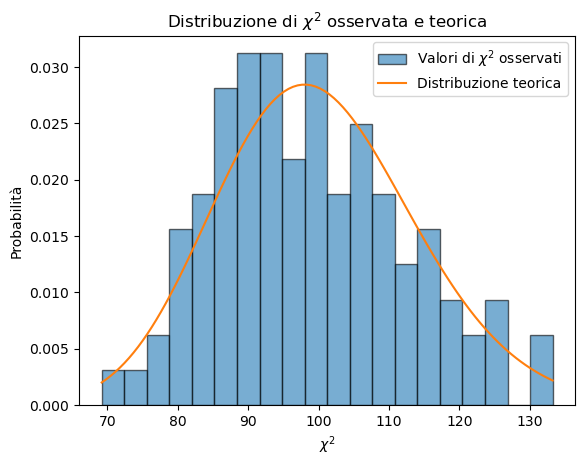

In [4]:
# parte 3
from scipy.stats import chi2

if not os.path.isfile(finp3):
    sys.exit( "file does not exist: " + finp3 )

x, chi2 = np.loadtxt(finp3, usecols=(0,1), delimiter=' ', unpack='true')

plt.hist(chi2, bins=20, density=True, edgecolor='black', alpha=0.6, label=r'Valori di $\chi^2$ osservati')

# Confronto con la distribuzione teoria
k=100
x_teo = np.linspace(min(chi2), max(chi2), 100)
y_teo = pow(x_teo, (k/2. - 1))*np.exp(-x_teo/2.)/(pow(2, k/2.) * math.gamma(k/2.))
plt.plot(x_teo, y_teo, label ='Distribuzione teorica')

plt.title(r'Distribuzione di $\chi^2$ osservata e teorica')
plt.ylabel('Probabilità')
plt.xlabel(r'$\chi^2$')
plt.legend()
plt.show()

Il grafico mostra il confronto tra i valori ottenuti del $\chi^2$ e l'andamento teorico, dato da:
$$ \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2-1} e^{-x/2}$$
con $\Gamma(k/2)$ funzione Gamma di Eulero e $k$ che coincide con il numero di blocchi.
Dal grafico si può notare che l'andamento teorico approssima bene il risultato numerico ottenuto: è possibile quindi dire che i numeri pseudo-casuali del generatore utilizzato derivano da una distribuzione uniforme.

### <span style="color:royalblue">Esercizio 01.2

Si è esteso il codice del generatore di numeri pseudo-casuali aggiungendo i metodi che generaro numeri distribuiti secondo una distribuzione esponenzile e una di Cauchy-Lorentz. Le funzioni utilizzate sono le funzioni cumulative inverse, ovvero:
$$x= \frac{-log(1-y)}{\lambda} $$
per la ditribuzione esponenziale, e
$$x= \mu + \gamma tan(\pi(y-1/2))$$
per la distibuzione di Cauchy-Lorentz

Si procede con il calcolo di $10^4$ volte $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (per $N=1, 2, 10, 100$), con $x_i$ un numero random campionato con un dado standard, un dado esponenziale ($\lambda=1$) e uno di Lorentz ($\mu=0$ and $\Gamma=1$). 

C:\Users\Utente\AppData\Local\Temp\ipykernel_6372\130781675.py:17: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*(x-c)**2)


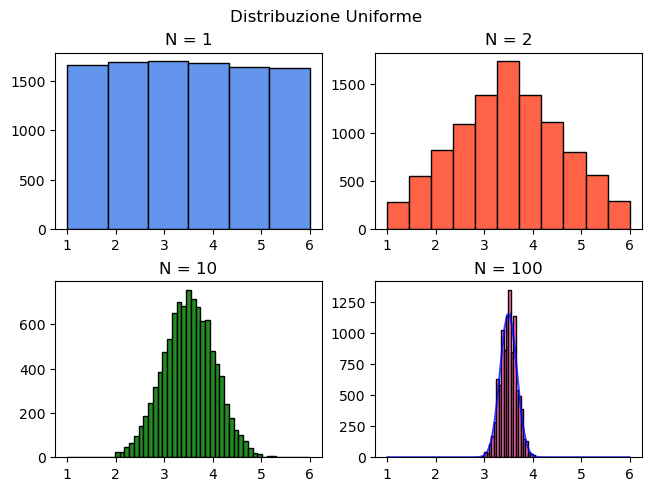

In [5]:
from scipy.optimize import curve_fit

dinp = "01.2/"
finp1 = dinp + "ese_01_2_uniform.out"
finp2 = dinp + "ese_01_2_exponential.out"
finp3 = dinp + "ese_01_2_cauchy_lorentz.out"

# https://matplotlib.org/stable/gallery/color/named_colors.html
colors = ["cornflowerblue", "tomato", "forestgreen", "hotpink"]

# Distribuzione Uniforme
if not os.path.isfile(finp1):
    sys.exit( "file does not exist: " + finp1 )

#Definisco la distribuzione gaussuana per il fit
def gaus(x,a,b,c):
    return a*np.exp(-b*(x-c)**2)
    
u1, u2, u10, u100 = np.loadtxt(finp1, usecols=(1,2,3,4), delimiter=' ', unpack='true')

fig1, spl1 = plt.subplots(nrows=2, ncols=2, layout='constrained')
spl1[0,0].hist(u1, bins=6, color=colors[0], edgecolor='black', range=(1,6) )
spl1[0,1].hist(u2, bins=11, color=colors[1], edgecolor='black', range=(1,6) )
spl1[1,0].hist(u10, bins=51, color=colors[2], edgecolor='black', range=(1,6) )
dati, bins, patches = spl1[1,1].hist(u100, 100, color=colors[3], edgecolor='black', range=(1,6) )

spl1[0,0].set_title("N = 1")
spl1[0,1].set_title("N = 2")
spl1[1,0].set_title("N = 10")
spl1[1,1].set_title("N = 100")

fig1.suptitle("Distribuzione Uniforme")

bin_centers = 0.5 * (bins[1:] + bins[:-1]) # centro i bin sulle x per eliminare gli spazi 
    #bins[:-1] prende i bordi sinistri dei bins, bins[1:] prende i bordi detri dei bins, li sommo e calcolo la media dei due valori
    #lavoro quindi con i valori centrali dell'istogramma
p_opt, p_cov = curve_fit(gaus, bin_centers, dati) #fitto con la gaussiana
x_teo = np.linspace(1,6,100)
spl1[1, 1].plot(x_teo, gaus(x_teo, p_opt[0], p_opt[1], p_opt[2]), color='blue', alpha=0.75)

#print("1: optimized parameters [a,b,c] =")
#print(p_opt)
#print("parameters uncertainty =")
#print(np.sqrt(np.diagonal(p_cov)))

plt.show()

C:\Users\Utente\AppData\Local\Temp\ipykernel_6372\130781675.py:17: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*(x-c)**2)


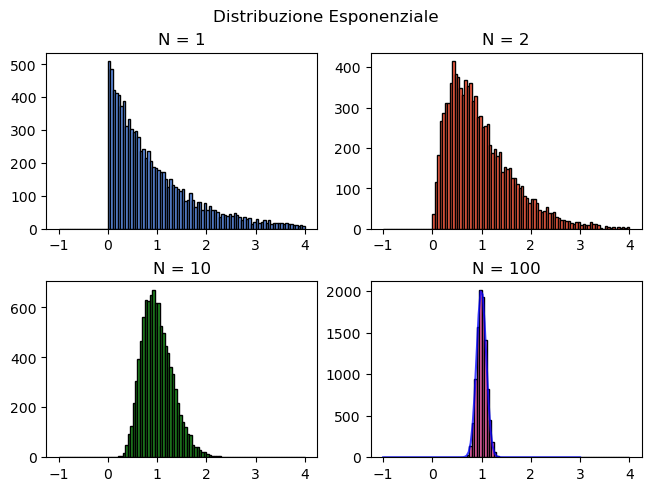

In [9]:
# DIstribuzione Esponenziale

if not os.path.isfile(finp2):
    sys.exit( "file does not exist: " + finp2 )

u1, u2, u10, u100 = np.loadtxt(finp2, usecols=(1,2,3,4), delimiter=' ', unpack='true')

fig2, spl2 = plt.subplots(nrows=2, ncols=2, layout='constrained')
spl2[0,0].hist(u1, bins=100, color=colors[0], edgecolor='black', range=(-1,4) )
spl2[0,1].hist(u2, bins=100, color=colors[1], edgecolor='black', range=(-1,4) )
spl2[1,0].hist(u10, bins=100, color=colors[2], edgecolor='black', range=(-1,4) )
dati, bins, patches = spl2[1,1].hist(u100, 100, color=colors[3], edgecolor='black', range=(-1,4) )

spl2[0,0].set_title("N = 1")
spl2[0,1].set_title("N = 2")
spl2[1,0].set_title("N = 10")
spl2[1,1].set_title("N = 100")

fig2.suptitle("Distribuzione Esponenziale")

bin_centers = 0.5 * (bins[1:] + bins[:-1]) # centro i bin sulle x per eliminare gli spazi 
    #bins[:-1] prende i bordi sinistri dei bins, bins[1:] prende i bordi detri dei bins, li sommo e calcolo la media dei due valori
    #lavoro quindi con i valori centrali dell'istogramma
p_opt, p_cov = curve_fit(gaus, bin_centers, dati) #fitto con la gaussiana
x_teo = np.linspace(-1,3,100)
spl2[1, 1].plot(x_teo, gaus(x_teo, p_opt[0], p_opt[1], p_opt[2]), color='blue', alpha=0.75)

plt.show()

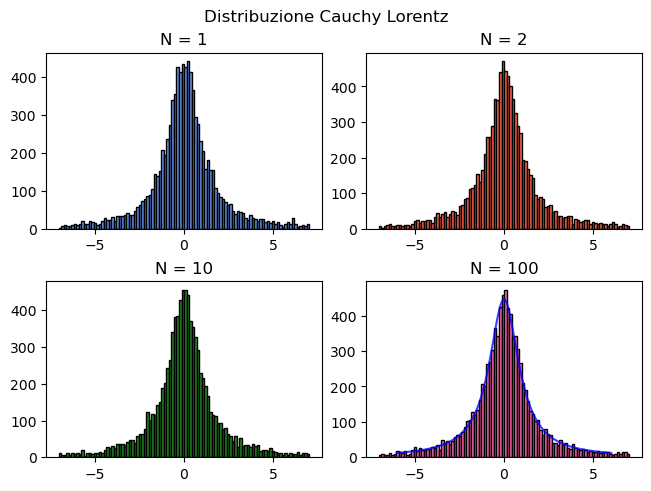

In [10]:
# DIstribuzione Cauchy Lorentz

if not os.path.isfile(finp3):
    sys.exit( "file does not exist: " + finp3 )

#Definisco la distribuzione Lorentziana per il fit
def lorentz(x, a, b): 
    return b / ( np.pi * a * (1 + (x/a)**2 ) )

u1, u2, u10, u100 = np.loadtxt(finp3, usecols=(1,2,3,4), delimiter=' ', unpack='true')

fig3, spl3 = plt.subplots(nrows=2, ncols=2, layout='constrained')
spl3[0,0].hist(u1, bins=100, color=colors[0], edgecolor='black', range=(-7,7) )
spl3[0,1].hist(u2, bins=100, color=colors[1], edgecolor='black', range=(-7,7) )
spl3[1,0].hist(u10, bins=100, color=colors[2], edgecolor='black', range=(-7,7) )
dati, bins, patches = spl3[1,1].hist(u100, 100, color=colors[3], edgecolor='black', range=(-7,7) )

spl3[0,0].set_title("N = 1")
spl3[0,1].set_title("N = 2")
spl3[1,0].set_title("N = 10")
spl3[1,1].set_title("N = 100")

fig3.suptitle("Distribuzione Cauchy Lorentz")

bin_centers = 0.5 * (bins[1:] + bins[:-1]) # centro i bin sulle x per eliminare gli spazi 
    #bins[:-1] prende i bordi sinistri dei bins, bins[1:] prende i bordi detri dei bins, li sommo e calcolo la media dei due valori
    #lavoro quindi con i valori centrali dell'istogramma
p_opt, p_cov = curve_fit(lorentz, bin_centers, dati) #fitto con la gaussiana
x_teo = np.linspace(-6,6,250)
spl3[1, 1].plot(x_teo, lorentz(x_teo, p_opt[0], p_opt[1]), color='blue', alpha=0.75)

plt.show()

Per $N=100$ il dado standard e quello esponenziale vengono fittati bene da una funzione gaussiana, il dado di Lorentz, invece, ha bisogno di un fit con distribuzione di Cauchy. Questo accade perchè tale distribuzione ha varianza infinita e, di conseguenza, non vale il teorema del limite centrale secodno cui se vengono prese molte medie da una qualsiasi popolazione con media μ e varianza finita σ², allora la distribuzione di queste medie tende a una distribuzione gaussiana, man mano che la dimensione del campione aumenta, indipendentemente dalla forma della distribuzione originale.

### <span style="color:royalblue">Esercizio 01.3

Si simula l'esperimento di Buffon in cui un ago di lunghezza $L$ viene lanciato su un piano orizzontale con righe a distanza $d$ (in modo che sia $d > L$). La probabilità $P$ che l'ago cadendo vada ad intersecare una riga è: $P = 2L/\pi d$. Questo può essere utilizzato per stimare il valore di $\pi$: se l'ago viene lancito $N_{thr}$ volte e si ha un'intersezione per $N_{hit}$ di queste volte, è possibile stimare $\pi$ come:
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Si esegue l'esperimento con un grande numero di lanci $M$ in funzione del numero $N$ di blocchi.

Suppondendo di non conoscere a priori il valore di $\pi$, e quindi di non poterlo utilizzare nel codice, si è considarato il quadrato di lato 2 e la circonferenza inscritta in esso. Si sfrutta il fatto che il rapporto tra i punti che cadono all'interno della circonferenza e il totale dei punti nel quadrato tende a $\pi/4 $ per un numero di punti che tende a infinito.

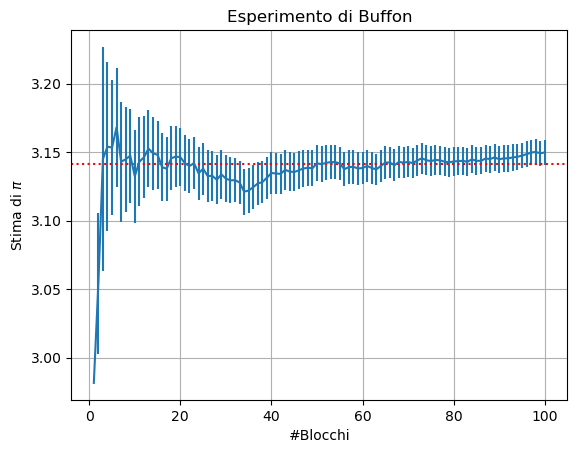

In [8]:
dinp = "01.3/"
finp = dinp + "ese_01_3.out"

if not os.path.isfile(finp):
    sys.exit( "file does not exist: " + finp )

x, y, error = np.loadtxt(finp, usecols=(0,2,3), delimiter=' ', unpack='true')

plt.errorbar(x,y,yerr=error, label="Dati esperimento")
plt.title(r'Esperimento di Buffon')
plt.xlabel('#Blocchi')
plt.ylabel(r'Stima di $\pi$')
#Inserisco il confronto con il valore vero 
plt.axhline(y=np.pi, color='red', linestyle='dotted', label="Valore atteso)")
plt.grid(True)
plt.show()

Dal grafico si nota che il valore trovato sperimentalmente con la sua incertezza è coerente con il valore atteso. Come mostrato nell'esercizio $01.1$ l'errore decresce con l'aumentare dei blocchi e in particolare ha un andamento proporzionale a $1/ \sqrt{N}$.